In [94]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
#import ncsr_import
import numpy as np
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp
#from dgl import DGLGraph 
import networkx as nx
import copy
#from pyhawkes.models import DiscreteTimeNetworkHawkesModelSpikeAndSlab


In [157]:

print(torch.cuda.get_rng_state().tolist())

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,

In [158]:
torch.cuda.is_available()
print(torch.get_rng_state().tolist())
torch.set_default_tensor_type('torch.cuda.FloatTensor') 

[176, 192, 199, 67, 74, 82, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 176, 192, 199, 67, 0, 0, 0, 0, 214, 190, 196, 148, 0, 0, 0, 0, 166, 189, 138, 163, 0, 0, 0, 0, 183, 149, 181, 36, 0, 0, 0, 0, 55, 0, 196, 244, 0, 0, 0, 0, 137, 232, 219, 102, 0, 0, 0, 0, 174, 133, 235, 255, 0, 0, 0, 0, 72, 82, 48, 166, 0, 0, 0, 0, 58, 17, 32, 229, 0, 0, 0, 0, 134, 76, 109, 19, 0, 0, 0, 0, 232, 230, 188, 199, 0, 0, 0, 0, 194, 221, 135, 89, 0, 0, 0, 0, 251, 216, 156, 92, 0, 0, 0, 0, 175, 100, 213, 224, 0, 0, 0, 0, 234, 195, 196, 55, 0, 0, 0, 0, 97, 133, 223, 96, 0, 0, 0, 0, 240, 254, 47, 252, 0, 0, 0, 0, 240, 160, 4, 171, 0, 0, 0, 0, 140, 1, 147, 113, 0, 0, 0, 0, 180, 17, 175, 1, 0, 0, 0, 0, 24, 80, 119, 198, 0, 0, 0, 0, 188, 13, 174, 187, 0, 0, 0, 0, 12, 26, 56, 185, 0, 0, 0, 0, 157, 197, 117, 183, 0, 0, 0, 0, 211, 14, 146, 227, 0, 0, 0, 0, 41, 40, 61, 26, 0, 0, 0, 0, 71, 201, 189, 121, 0, 0, 0, 0, 185, 222, 128, 161, 0, 0, 0, 0, 227, 242, 38, 170, 0, 0, 0, 0, 226, 59, 127, 137, 0, 0, 0, 0

In [159]:
ncsr_age = pd.read_csv('age_subset.csv', index_col=0)

In [160]:
ncsr_vars = pd.read_csv("time_series_vars_ncs2.csv", index_col=0)

In [161]:
AGO = []
ncsr_age = pd.read_csv('age_subset.csv', index_col=0)
dsm_type = "GAD"
for filename in os.listdir(r'C:\Users\galyn\Documents\GitHub\Seminar\individual_graphs/DSM_' + dsm_type):
    
    nxg= nx.read_gpickle('individual_graphs/DSM_' + dsm_type + "/"+filename)
    for node in nxg.nodes:
            nxg.nodes[node]['name-age'] = [list(ncsr_age.columns).index(node), nxg.nodes[node]['age']]
    dgl_graph = dgl.from_networkx(nxg, node_attrs = ['name-age'])
    AGO.append(dgl_graph)

In [162]:
AGO_full = copy.deepcopy(AGO)

In [163]:
x = [x for x in range(len(AGO_full))]
x = np.random.choice(x, int(len(AGO_full)*.6))

AGO = [AGO_full[i] for i in x]

In [164]:
len(AGO)

451

In [165]:
dbatch = dgl.batch(AGO, ndata=['name-age'])

In [166]:
dbatch = dbatch.to('cuda:0')

In [167]:
dbatch.ndata['name-age'].shape

torch.Size([20119, 2])

In [168]:
u, v = dbatch.edges()

In [169]:
eids = np.arange(dbatch.number_of_edges())
eids = np.random.permutation(eids)

In [170]:
test_size = int(len(eids)*.1)

In [171]:
train_size = dbatch.number_of_edges() - test_size

In [172]:
test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]


In [173]:
from torch.utils.data import DataLoader

In [174]:
adj = sp.coo_matrix((np.ones(len(u)), ((u.cpu()).numpy(), (v.cpu()).numpy())))
adj_neg = 1 - adj.todense() - np.eye(dbatch.number_of_nodes())
neg_u, neg_v = np.where(adj_neg != 0)
u.cuda()
v.cuda()

tensor([   26,    17,    40,  ..., 20066, 20091, 20066])

In [175]:
u

tensor([   26,    26,    26,  ..., 20090, 20091, 20091])

In [176]:
neg_eids = np.random.choice(len(neg_u), dbatch.number_of_edges() // 2)
test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

In [177]:
train_g = dgl.remove_edges(dbatch, eids[:test_size])

In [178]:
from dgl.nn import SAGEConv

In [179]:
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')
        self.conv3 = SAGEConv(h_feats, h_feats, 'mean')

    def forward(self, g, in_feat):
        #in_feat = in_feat.view(1, -1)
        in_feat = in_feat.cuda()
        h = self.conv1(g.to('cuda:0'), in_feat.cuda())
        h = F.relu(h)
        h = self.conv2(g, h)
        h = F.relu(h)
        h = self.conv3(g, h)
        return h

In [180]:
train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=dbatch.number_of_nodes())
train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=dbatch.number_of_nodes())

test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=dbatch.number_of_nodes())
test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=dbatch.number_of_nodes())

In [181]:
import dgl.function as fn

class MLPPredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 1)

    def apply_edges(self, edges):
        """
        Computes a scalar score for each edge of the given graph.

        Parameters
        ----------
        edges :
            Has three members ``src``, ``dst`` and ``data``, each of
            which is a dictionary representing the features of the
            source nodes, the destination nodes, and the edges
            themselves.

        Returns
        -------
        dict
            A dictionary of new edge features.
        """
        h = torch.cat([edges.src['h'], edges.dst['h']], 1).cuda()
        return {'score': self.W2(F.relu(self.W1(h))).squeeze(1)}

    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            g.apply_edges(self.apply_edges)
            return g.edata['score']

In [182]:
class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            # Compute a new edge feature named 'score' by a dot-product between the
            # source node feature 'h' and destination node feature 'h'.
            g.apply_edges(fn.u_dot_v('h', 'h', 'score'))
            # u_dot_v returns a 1-element vector for each edge so you need to squeeze it.
            return g.edata['score'][:, 0]

In [183]:
model = GraphSAGE(train_g.ndata['name-age'].shape[1], 1)
# You can replace DotPredictor with MLPPredictor.
#pred = MLPPredictor(1)
pred = DotPredictor()

def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])])
    return F.binary_cross_entropy_with_logits(scores, labels)

def compute_auc(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score]).numpy()
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).cpu().numpy()
    return roc_auc_score(labels, scores)

In [184]:
from tqdm import tqdm

In [185]:
auc = [] 
sample_iter = 0

In [186]:
auc.append([])

In [36]:
x = [x for x in range(len(AGO_full))]
res_rate = .6
x = np.random.choice(x, int(len(AGO_full)*res_rate))

AGO = [AGO_full[i] for i in x]
dbatch = dgl.batch(AGO, ndata=['name-age'])
dbatch = dbatch.to('cuda:0')
u, v = dbatch.edges()

eids = np.arange(dbatch.number_of_edges())
eids = np.random.permutation(eids)

test_size = int(len(eids)*.1)
train_size = dbatch.number_of_edges() - test_size
test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]

adj = sp.coo_matrix((np.ones(len(u)), ((u.cpu()).numpy(), (v.cpu()).numpy())))
adj_neg = 1 - adj.todense() - np.eye(dbatch.number_of_nodes())
neg_u, neg_v = np.where(adj_neg != 0)

neg_eids = np.random.choice(len(neg_u), dbatch.number_of_edges() // 2)
test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

train_g = dgl.remove_edges(dbatch, eids[:test_size])

train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=dbatch.number_of_nodes())
train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=dbatch.number_of_nodes())

test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=dbatch.number_of_nodes())
test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=dbatch.number_of_nodes())

auc.append([])
sample_iter += 1

In [187]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #

for r in [2500]:
    for e in tqdm(range(r)):
        # forward
        h = model(train_g.to('cuda:0'), (train_g.ndata['name-age'].float()).cuda())
        pos_score = pred(train_pos_g.to('cuda:0'), h.cuda())
        neg_score = pred(train_neg_g, h)
        loss = compute_loss(pos_score, neg_score)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if e % 100 == 0:
            print('In epoch {}, loss: {}'.format(e, loss))
            from sklearn.metrics import roc_auc_score
            with torch.no_grad():
                pos_score = pred(test_pos_g, h).cpu()
                neg_score = pred(test_neg_g, h).cpu()
                auc[sample_iter].append(compute_auc(pos_score, neg_score))
                print('AUC', e, compute_auc(pos_score, neg_score))

    # ----------- 5. check results ------------------------ #
    from sklearn.metrics import roc_auc_score
    with torch.no_grad():
        pos_score = pred(test_pos_g, h).cpu()
        neg_score = pred(test_neg_g, h).cpu()
        auc[sample_iter].append(compute_auc(pos_score, neg_score))
        print('AUC', e, compute_auc(pos_score, neg_score))

  4%|▍         | 102/2500 [00:02<00:56, 42.62it/s]In epoch 100, loss: 15.587682723999023
AUC 100 0.5492744198841428
  8%|▊         | 202/2500 [00:04<00:53, 42.60it/s]In epoch 200, loss: 3.558579444885254
AUC 200 0.5744313974173949
 12%|█▏        | 304/2500 [00:06<01:04, 33.98it/s]In epoch 300, loss: 1.5974417924880981
AUC 300 0.6003781626636617
 16%|█▌        | 404/2500 [00:08<00:54, 38.80it/s]In epoch 400, loss: 1.1144706010818481
AUC 400 0.6101393646959479
 20%|█▉        | 498/2500 [00:10<00:37, 54.07it/s]In epoch 500, loss: 0.9514420032501221
AUC 500 0.6089493181009453
 24%|██▍       | 602/2500 [00:13<00:56, 33.49it/s]In epoch 600, loss: 0.8799629211425781
AUC 600 0.605820931591439
 28%|██▊       | 702/2500 [00:15<00:55, 32.30it/s]In epoch 700, loss: 0.8398048281669617
AUC 700 0.6040388711899414
 32%|███▏      | 798/2500 [00:17<00:41, 41.50it/s]In epoch 800, loss: 0.809628427028656
AUC 800 0.6040856099897673
 36%|███▌      | 901/2500 [00:20<00:40, 39.33it/s]In epoch 900, loss: 0.784

In [ ]:
with torch.no_grad():
    pos_score = pred(test_pos_g, h)
    neg_score = pred(test_neg_g, h)

In [38]:
auc_iteration = []
for x in range(len(auc)): 
    auc_iteration.append(100+100*x)

In [39]:
import copy
dot_auc = copy.deepcopy(auc)

In [40]:
len(test_neg_g.edges()[1])

54442

In [41]:
auc_total = [x for sublist in auc for x in sublist]

In [42]:
auc_resample = []
auc_resample.append(0)
aucsum = 0
for idx, x in enumerate(auc): 
    auc_resample.append(len(x) + aucsum)
    aucsum += len(x)

In [43]:
auc_resample

[0, 26, 52, 78]

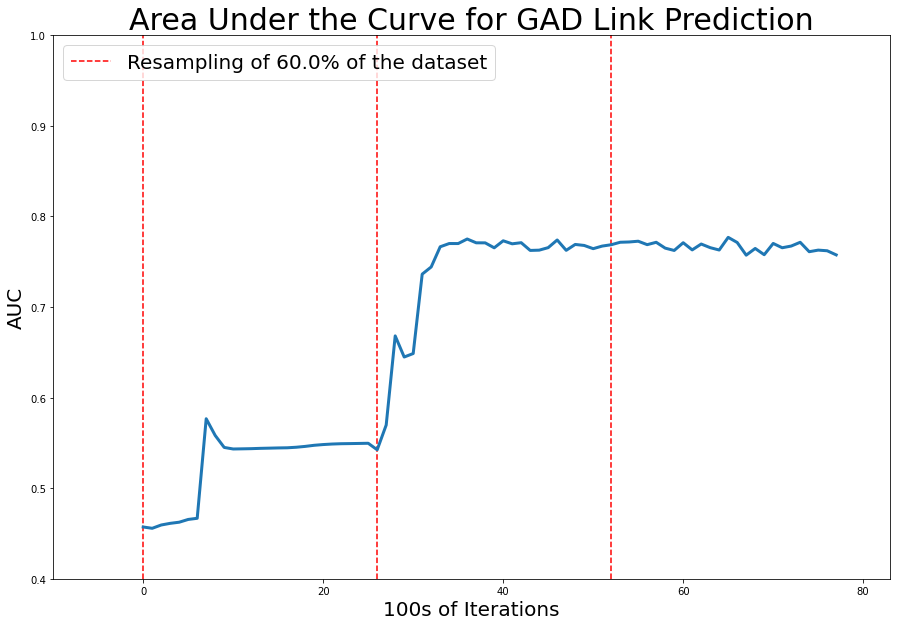

In [44]:
plt.figure(3, figsize=(15,10))
plt.axis([-10, auc_resample[len(auc_resample)-1] + 5, .4, 1])
for xc in auc_resample[:len(auc_resample)-1]: 
    line = plt.axvline(x = xc, color = 'r', linestyle='--')

plt.plot(auc_total, lw = 3)
plt.title("Area Under the Curve for " + dsm_type + " Link Prediction", size = 30)
plt.xlabel("100s of Iterations", size = 20)
plt.ylabel("AUC", size = 20)
plt.legend([line], ['Resampling of ' +  str(res_rate*100) +'% of the dataset'], loc = 'upper left', fontsize = 20)
plt.savefig("determine_plots/gad_" + str(res_rate*100) + "_auc.jpg",  bbox_inches = 'tight')

In [53]:
test_pos_g.edata['weight'] = pos_score

In [86]:
test_pos_g.edata['weight']

tensor([0.8826, 0.8826, 0.8826,  ..., 0.8826, 0.8826, 0.8826])

In [88]:
test_pos_g.edges()

(tensor([ 7292,  5672,  5384,  ...,  2542,  2599, 10654]),
 tensor([ 7353,  5675,  5385,  ...,  2587,  2578, 10664]))

In [61]:
nxg = test_pos_g.cpu().to_networkx(edge_attrs=['weight'])


In [70]:
mapping = {}
columns = list(ncsr_age.columns)
for idx, x in enumerate(dbatch.ndata['name-age']):
    x = x.tolist()
    mapping[idx] = columns[x[0]]

In [57]:
node_count = [[0]*len(columns)]*len(columns)

In [246]:
G = nx.read_gpickle('link_prediction_nx/DSM_MDDH_GAD_1500_25-10.pkl')
#ndata = dbatch.ndata['name-age']
columns = list(ncsr_age.columns)

In [117]:
for x in columns: 
    G.add_node(x)

In [118]:
for idx, x in enumerate(test_pos_g.edges()[0]):
    from_node = columns[ndata[x][0]]
    to_node = columns[ndata[test_pos_g.edges()[1][idx]][0]]
    if G.has_edge(from_node, to_node):
        G[from_node][to_node]['w'] += pos_score[idx]
    else: 
        G.add_edges_from([(from_node, to_node)])
        G[from_node][to_node]['w'] = pos_score[idx]
    node_count[columns.index(from_node)][columns.index(to_node)] += 1

In [195]:
edge_weights = []
for edge in G.edges():
    edge_weights.append(G[edge[0]][edge[1]]['w'])



In [196]:
edge_weights = [float(x) for x in edge_weights]

In [247]:
edge_weights_sub = []
for x in edge_weights: 
    if x> 1: 
        edge_weights_sub.append(x)

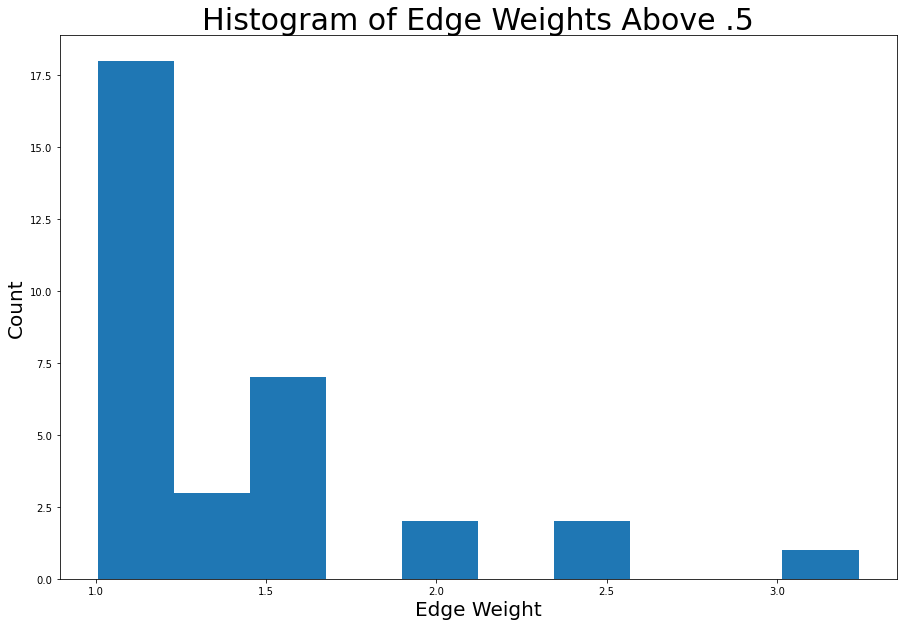

In [249]:
plt.figure(3, figsize=(15,10))
plt.title("Histogram of Edge Weights Above .5", size = 30)
plt.ylabel("Count", size = 20)
plt.xlabel("Edge Weight", size = 20)
plt.hist(edge_weights_sub)
plt.savefig("histograms/1_dsm_gad_mddh_1500_25.jpg",  bbox_inches = 'tight')


In [250]:
Gc = copy.deepcopy(G)
for x in columns: 
    for y in columns: 
        if Gc.has_edge(x, y) and x == y: 
            Gc. remove_edge(x, y)
        if Gc.has_edge(x, y) and Gc[x][y]['w'] < .5:
            Gc.remove_edge(x, y)
Gc.remove_nodes_from(list(nx.isolates(Gc)))

In [233]:
Gc.edges()

OutEdgeView([('D37A', 'SU83'), ('D38C', 'OD3B1'), ('D87A', 'EA19B1'), ('M33A', 'M45A'), ('PD9A', 'PD9B'), ('PD9B1', 'M6C'), ('PD10D', 'PD9B'), ('PD15', 'M18A'), ('PD16E', 'SD23A'), ('PD37A', 'PT256A'), ('PD50A', 'D42'), ('PD65A', 'M45A'), ('SP3C1', 'IR7A'), ('SP3C1', 'IR71A'), ('SP13A1', 'CC39_1'), ('SP13C1', 'SP38A'), ('SP20', 'GM16B'), ('SP27A', 'SP38A'), ('SP38A', 'CC39_1'), ('SO3A', 'SP38A'), ('SO3A', 'N32A'), ('G26A', 'SU30'), ('G27C', 'SU83'), ('G27C', 'O28C'), ('G56A', 'M6C'), ('SD3A', 'PT120'), ('SD3A', 'M45A'), ('SD3A', 'M19D'), ('SD5A', 'M19D'), ('SD5A', 'M18A'), ('SD8', 'EA19B1'), ('SD8', 'M33A'), ('SD10A', 'SU83'), ('SR21', 'M19D'), ('SR27', 'O28C'), ('SR40', 'PT120'), ('SR87', 'CC44'), ('SU1', 'CN7_2A'), ('SU1', 'IED18B'), ('SU15A', 'M45A'), ('SU15A', 'SU30'), ('SU45A', 'PT57A1'), ('SU45B', 'M45A'), ('SU45B', 'O16C'), ('SU45C', 'PT120'), ('SU68A', 'M19D'), ('SU87A', 'N32A'), ('SU2A', 'SU15B1'), ('CC3B', 'EA19B1'), ('CC3B', 'SD23A'), ('CC3B', 'OD3B1'), ('CC3B', 'M6C'), ('CC

In [267]:
import ncsr_import
ncsr = ncsr_import.ncsr_data()

C:\Users\galyn\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (910,953,3340,3518,3573,3581,3582,3583,3584,3616,3620,3711) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [282]:
#G = nx.read_gpickle('graph.pkl')
#G = main_graph
#pos = nx.kamada_kawai_layout(G, pos = nx.spring_layout(G, k = .15, iterations = 100, seed = 10020) )#

from networkx.drawing.nx_pydot import graphviz_layout
for idx, x in enumerate(list(nx.weakly_connected_components(Gc))):
    print(idx)
    Gc_sub = Gc.subgraph(x)
    pos = graphviz_layout(Gc_sub, prog="neato")

    #pos = nx.spring_layout(G, k = 4, iterations = 100, seed = 10020)
    levels = []
    vals = {}

    f = plt.figure(3, figsize=(30,30))

    #nx.draw_networkx(Gc, pos, arrowsize = 20)

    nx.draw_networkx(Gc_sub, pos, node_size= 3000, with_labels = True, edge_color = [x.tolist() for x in list(nx.get_edge_attributes(Gc_sub, 'w').values())], arrowsize= 20, width = 3, edge_cmap =  plt.get_cmap('Greens'), edge_vmin = -1)#, connectionstyle="arc3,rad=.3")
    ax = []
    #for x in level_vals:
        #ax.append(.Line2D([], [], color=scalarMap.to_rgba(level_set.index(x) + 1), label = "Category: " + x, marker="o", markersize=20))
    #plt.legend(prop={'size': 20}, handles = ax)
    nx.draw_networkx_nodes(Gc_sub, pos, node_color = 'white', node_size = 2000)
    #nodes = nx.draw_networkx_nodes(G, pos, node_color = level_vals, vmax = max(level_vals) + .1, vmin = max(level_vals) - .1, node_size = 0)
    edges = nx.draw_networkx_edges(Gc_sub, pos, edge_color = [x.tolist() for x in list(nx.get_edge_attributes(Gc_sub, 'w').values())], edge_cmap =  plt.get_cmap('Greens'), arrows=False, edge_vmin=-1, width = 0)
    edge_cbar = plt.colorbar(edges, orientation='horizontal', pad = 0.03)
    #node_cbar = plt.colorbar(nodes, orientation='horizontal', pad = 0)
    edge_cbar.set_label("Edge Prevalence", size = 25)
    #node_cbar.set_label("Node Prevalence", size = 25)
    plt.title("MDD/GAD Comorbid Network - Subgraph " + str(idx+1), fontsize = 40)#diag1 + " - " + diag2, fontsize = 40)
    bbox_props = dict(boxstyle= "round, pad =.4", ec = 'black', fc = 'white')
    g = r"$\bf{" + "Node" + "}$" + " " +  r"$\bf{" + "Descriptions:" + "}$" + "\n"
    for x in list(Gc_sub.nodes):
        g += x + ": " + ncsr.search_for_description(x)[1] + "\n" 
        t = plt.annotate(g, xy = (1.01,-.1), xycoords='axes fraction', bbox = bbox_props, size = 20)
    plt.savefig('dgl_graphs/case_mad_gad_' + str(idx) + '.jpg', bbox_inches = 'tight')
    plt.clf()


0
1
2
3
4
5
6
7
8
9


<Figure size 2160x1440 with 0 Axes>

In [75]:
len(nxg.edges)

979

In [272]:
list(nx.weakly_connected_components(Gc))

[{'CC3B',
  'CC3E',
  'CC3F',
  'CC3J',
  'CC3O',
  'CC44',
  'CN7_2A',
  'D37A',
  'D38C',
  'D87A',
  'EA19B1',
  'EA26A',
  'EM1',
  'G26A',
  'G27C',
  'G56A',
  'IED18B',
  'M18A',
  'M19D',
  'M33A',
  'M45A',
  'M6C',
  'MR19',
  'MR1_2',
  'O16C',
  'O28C',
  'O45A',
  'O67A',
  'OD3B1',
  'PD15',
  'PD16E',
  'PD65A',
  'PD9B1',
  'PR2',
  'PT120',
  'PT59B_5',
  'PT64A',
  'SA19A',
  'SD10A',
  'SD21',
  'SD23A',
  'SD3A',
  'SD5A',
  'SD8',
  'SR21',
  'SR27',
  'SR40',
  'SR87',
  'SU1',
  'SU102A',
  'SU15A',
  'SU15B1',
  'SU2A',
  'SU30',
  'SU45B',
  'SU45C',
  'SU68A',
  'SU83'},
 {'D42', 'PD50A'},
 {'IR71A', 'IR7A', 'SP3C1'},
 {'PD10D', 'PD9A', 'PD9B'},
 {'CH2B', 'CN5B', 'PD37A', 'PR4C', 'PT256A'},
 {'CC39_1', 'N32A', 'SO3A', 'SP13A1', 'SP13C1', 'SP27A', 'SP38A', 'SU87A'},
 {'GM16B', 'SP20'},
 {'PT57A1', 'SU45A'},
 {'N31', 'PT119'},
 {'AD32B', 'DM_MR19'}]

In [275]:
Gc.subgraph(['AD32B', 'DM_MR19'])